In [1]:
import pandas as pd 

red_wine = pd.read_csv('/home/kkyu/amr_ws/ML/data/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('/home/kkyu/amr_ws/ML/data/winequality-white.csv', sep = ';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

/tmp/ipykernel_7391/1002286848.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
X = wine.drop(['color'], axis = 1)
y = wine['color']

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

In [4]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [5]:
pipe.steps[0]

('scaler', StandardScaler())

In [6]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

### 스텝별로 객체 호출

In [7]:
pipe[0]

StandardScaler()

In [8]:
pipe['scaler']

StandardScaler()

### set_params

In [9]:
pipe.set_params(clf__max_depth = 2)
pipe.set_params(clf__random_state = 13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

### Pipeline을 이용한 분류기 구성


![Screenshot from 2024-02-13 09-58-10.png](<attachment:Screenshot from 2024-02-13 09-58-10.png>)
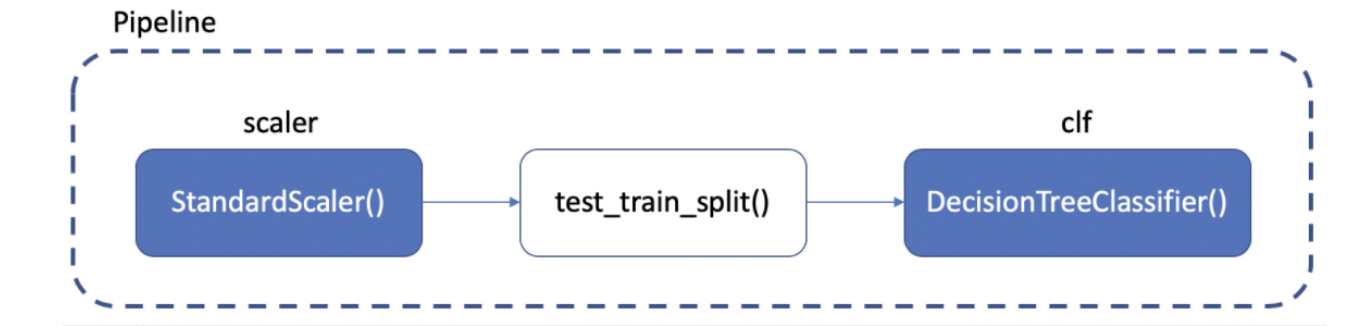

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,
                                                    random_state= 13,
                                                    stratify= y)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

### 성과

In [11]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9657494708485664
Test Acc :  0.9576923076923077


### 모델 구조 확인

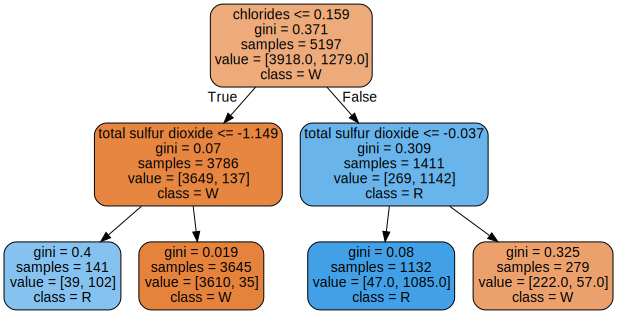

In [12]:
from graphviz import Source 
from sklearn.tree import export_graphviz

Source(export_graphviz(pipe['clf'], feature_names= X.columns,
                       class_names = ['W', 'R'],
                       rounded = True, filled = True))

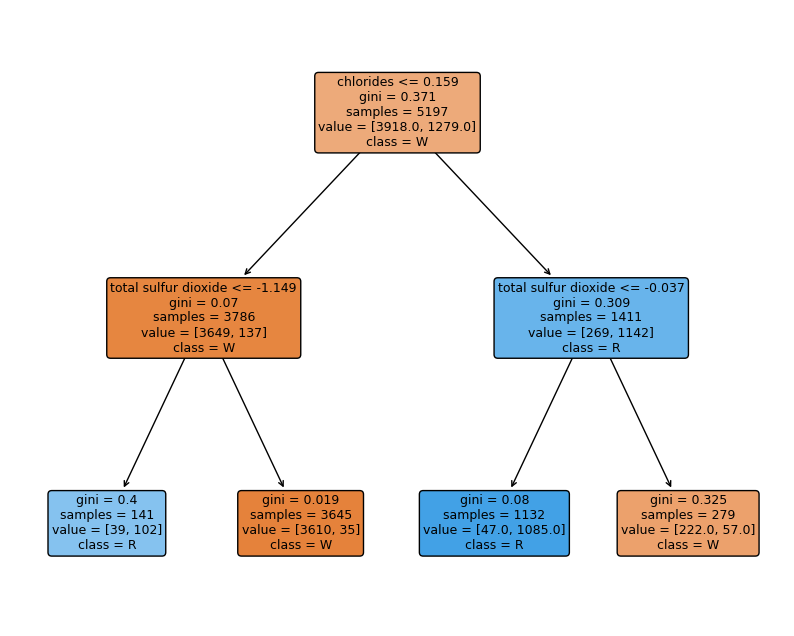

In [13]:
import matplotlib.pyplot as plt 
from sklearn import tree 

fig = plt.figure(figsize = (10,8))
_= tree.plot_tree(pipe['clf'],
                   feature_names= X.columns,
                   class_names = ['W','R'],
                   rounded=True, filled = True)